# Figure 5

Corresponds to Section 4 of the results, regarding DRL robustness and sensitivity to variation in patient parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import Locator, MaxNLocator, LogLocator
from matplotlib.colors import LogNorm, to_rgb, LinearSegmentedColormap

In [2]:
# Defaults for plotting
plt.style.use(["classic", "./paper.mplstyle"])
plt.rcParams['font.size'] = '18'

colors = {'Sensitive': '#4c9150', 'Resistant': '#a80303', 'CT':'#c28d32' , 'AT':'#143159' ,'DRL_Monthly':'#66419e'}

In [3]:
def convert_to_rgb_grayscale(col):
    rgb_col = to_rgb(col)
    return tuple([(0.2989 * rgb_col[0]) + (0.5870 * rgb_col[1]) + (0.1140 * rgb_col[2]) for _ in range(3)])

def redistribute_rgb(col):
    r, g, b = col
    threshold = 1 
    m = max(r, g, b)
    if m <= threshold:
        return r, g, b
    total = r + g + b
    if total >= 3 * threshold:
        return threshold, threshold, threshold
    x = (3 * threshold - total) / (3 * m - total)
    gray = threshold - x * m
    return (gray + x * r), (gray + x * g), (gray + x * b)

/tmp/ipykernel_1971583/1978554480.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([''] + list(colors.keys()));


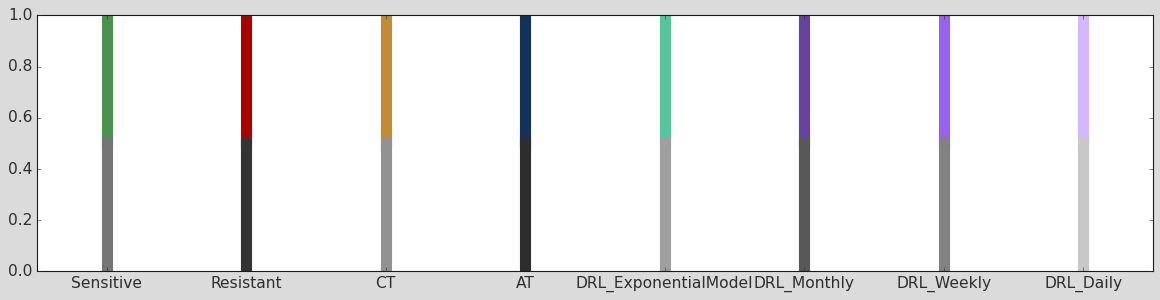

In [4]:
# Defaults for plotting
plt.style.use(["classic", "./paper.mplstyle"])

colors = {'Sensitive': '#4c9150', 'Resistant': '#a80303', 'CT':'#c28d32' , 'AT':'#143159' ,'DRL_ExponentialModel': '#58c49d', 'DRL_Monthly':'#66419e'}

colors['DRL_Weekly'] = redistribute_rgb(tuple([1.5 * x for x in to_rgb(colors['DRL_Monthly'])]))
colors['DRL_Daily'] = redistribute_rgb(tuple([2.0 * x for x in to_rgb(colors['DRL_Monthly'])]))


fig, ax = plt.subplots(1, 1, figsize=(18, 4))
for i, col in enumerate(colors.values()):
    plt.axvline(i+1, 0.5, 1, color = col, linewidth=10)
    plt.axvline(i+1, 0, 0.5, color = convert_to_rgb_grayscale(col), linewidth=10)
plt.xlim(0.5, len(colors.values()) + 0.5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().set_xticklabels([''] + list(colors.keys()));

## Panel A - Bruchovsky Patients

In [33]:
df = pd.read_csv("data/Fig4/fitSummaryDf_prog.csv")

df.rename(columns={'cost': 'Cost', 'turnover': 'Turnover', 'NCycles': 'Cycle Number'}, inplace=True)
print(df.columns.values)

['Unnamed: 0.1' 'Unnamed: 0' 'AIC' 'BIC' 'D' 'DMax' 'FitId' 'PatientId'
 'R0' 'RSquared' 'S0' 'Cost' 'dD' 'dR' 'dS' 'fR' 'k' 'n0' 'rR' 'rS'
 'theta' 'Turnover' 'NSuccessfulFits' 'Cycle Number' 'TimeInTrial'
 'Progression' 'sen_turnover' 'res_turnover' 'ATProgression']


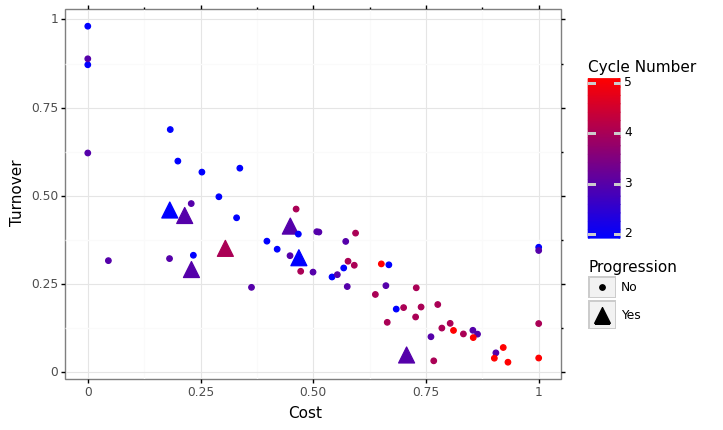

In [34]:
import plotnine as pn
from plotnine import ggplot, geom_point, geom_line, geom_tile, aes

cost = (ggplot(df, aes(x ='Cost', y='Turnover', color = 'Cycle Number',
                       shape = 'factor(ATProgression)', size = 'ATProgression'))
        + geom_point() + pn.theme_bw()  + pn.scale_color_gradient(low='blue', high='red')
        + pn.scales.scale_size_continuous(range = (1.75, 6), guide=False)
        + pn.scales.scale_shape_discrete(labels = ['No', 'Yes'])
        + pn.guides(shape=pn.guide_legend(override_aes = {'size': [1.75, 6]}, title = 'Progression')))
        # + pn.theme(text=element_text(size=24)))
# cost.save("../images/patient_data/cost_vs_turnover.pdf", verbose = False)
cost.draw();

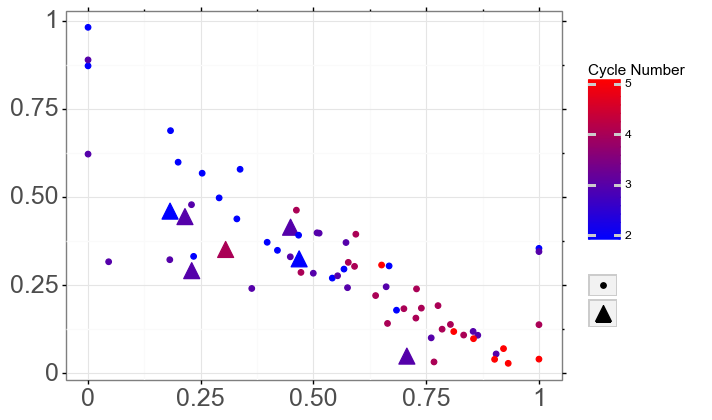

In [35]:
cost = (ggplot(df, aes(x ='Cost', y='Turnover', color = 'Cycle Number',
                       shape = 'factor(ATProgression)', size = 'ATProgression'))
        + geom_point() + pn.theme_bw()  + pn.scale_color_gradient(low='blue', high='red')
        + pn.scales.scale_size_continuous(range = (1.75, 6), guide=False)
        + pn.scales.scale_shape_discrete(labels = ['', ''])
        + pn.guides(shape=pn.guide_legend(override_aes = {'size': [1.75, 6]}, title = ''))
        # + pn.guides(color=pn.guide_legend(title = ''))
        + pn.theme(text = pn.element_text(family = 'Arial'))
        + pn.theme(axis_text_x = pn.element_text(size=18), axis_text_y = pn.element_text(size=18))
        + pn.theme(axis_title_x = pn.element_blank(), axis_title_y = pn.element_blank())
        )
# cost.save("../images/patient_data/cost_vs_turnover.pdf", verbose = False)
cost.draw();

In [36]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

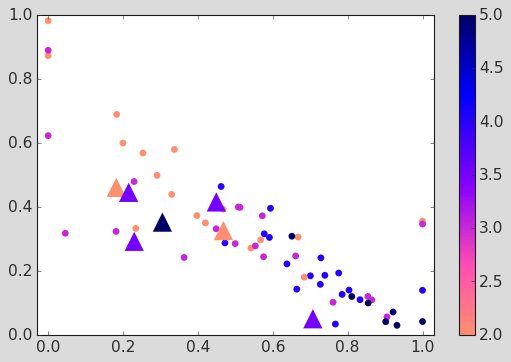

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))

cmap = truncate_colormap(plt.get_cmap('gnuplot2_r'), 0.3, 0.9); plt.colorbar(ax_im, ax=ax)

ax.scatter(df[df.ATProgression==1].Cost, df[df.ATProgression==1].Turnover, c = df[df.ATProgression==1]['Cycle Number'], cmap = cmap, marker='^', s = 300, zorder=1, edgecolors='none')
ax_im = ax.scatter(df[df.ATProgression==0].Cost, df[df.ATProgression==0].Turnover, c = df[df.ATProgression==0]['Cycle Number'], cmap=cmap, marker='.', s = 150, zorder=0, edgecolors='none')


ax.set_xlim(-0.03, 1.03); ax.set_ylim(0, 1);
plt.savefig("../paper_figures/figures/fig4a_bruchovsky_patients.pdf")

## Panel C - Sensitivity to variation in patient parameters

In [121]:
def prog_limit(cost, n0, K):
    return (1 - (1.2 * n0) / K) * (1 - cost)

In [122]:
load_name = "../paper_figures/data/Fig4/parameter_space_comp_p25weekly_full"

n0, r0 = 0.426, 0.00000426  # p25
dx, dy = 0.025, 0.025
t_max = 10000

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(0, 1 + dy, dy),
                slice(0, 1 + dx, dx)]

z_at = np.load(load_name + "_at.npy")
z_ct = np.load(load_name + "_ct.npy")
z_dl = np.load(load_name + "_dl.npy")

/tmp/ipykernel_1793867/3066744498.py:3: RuntimeWarning: invalid value encountered in true_divide
  diff_at = np.divide((z_dl - z_at), z_at) * 100  # Percentage difference


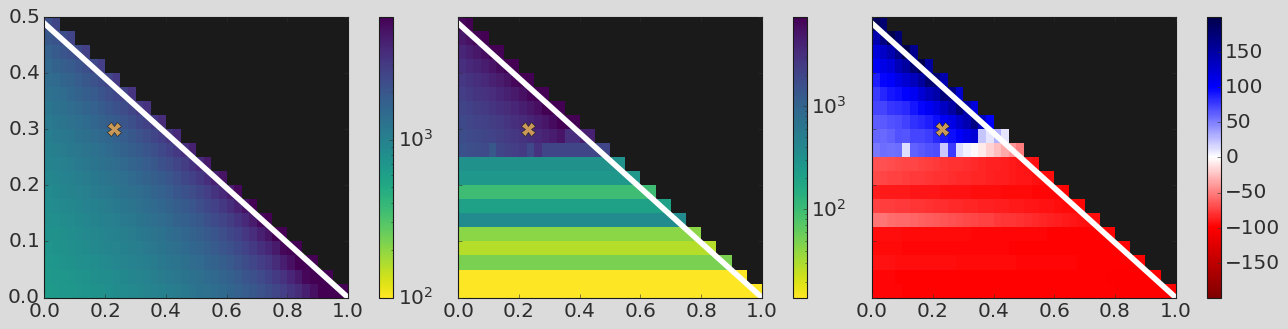

In [155]:
fig, axs = plt.subplots(1, 3, figsize = (16, 4), sharey=True, constrained_layout=True)

diff_at = np.divide((z_dl - z_at), z_at) * 100  # Percentage difference
titles = ["Adaptive Therapy", "DRL Model", "AT Difference (%)"]
norms = [LogNorm, LogNorm, None]

# Remove values where progression didn't occur

z_at = np.nan_to_num(z_at, t_max)
z_ct = np.nan_to_num(z_ct, t_max)
z_dl = np.nan_to_num(z_dl, t_max)

z_at = np.ma.masked_where(z_ct == t_max, z_at)
z_dl = np.ma.masked_where(z_ct == t_max, z_dl)
diff_at = np.ma.masked_where(z_at == t_max, diff_at)

z_at[z_at == t_max] = np.nan
z_dl[z_dl == t_max] = np.nan

# z_diff += np.min(z_diff[np.nonzero(z_diff)])  # To remove zeroes

for i, z in enumerate([z_at, z_dl, diff_at]):
    z = z[:-1, :-1]
    z_min, z_max = np.nanmin(np.abs(z)), np.nanmax(np.abs(z))
    z_min = np.nanmin(np.abs(z[np.nonzero(z)])) if z_min == 0 else z_min

    ax = axs[i]; ax.set_facecolor("k") #d9dadb")  # Background colour
    cost_range = np.linspace(x.min(), x.max(), 100)

    if norms[i] is None:
        z_min, z_max = -np.nanmax(np.abs(z)), np.nanmax(np.abs(z))  # max amplitude inc negatives
        c = ax.pcolormesh(x, y, z, cmap='seismic_r', vmin=z_min, vmax=z_max, norm=norms[i])
    else:
        norm = LogNorm
        c = ax.pcolormesh(x, y, z, cmap='viridis_r', norm=norms[i](vmin=min(z_min, 100), vmax=z_max))
    ax.set_title('pcolormesh')
    # set the limits of the plot to the limits of the data
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)
    ax.plot(cost_range, prog_limit(cost_range, n0=n0, K=1), color = 'w', linewidth = 5)
    ax.set_title("") #titles[i])
    ax.set_ylim(0, 0.5)
    ax.plot(0.23, 0.30, color='#cc9a58', marker='X', markersize=12)
    

# plt.tight_layout()  # Can use instead of constrained_layout
plt.savefig("../paper_figures/figures/fig4c_cost_turnover_space.pdf")
